In [133]:
# This class exists to exercise the functionality of the data importing classes

import tensorflow as tf
import data_utils
from importlib import reload
from matplotlib.pyplot import *
from matplotlib import patches

Found 23501 files belonging to 3 classes.
Using 18801 files for training.
Found 23501 files belonging to 3 classes.
Using 4700 files for validation.
{'x': 378, 'y': 195, 'width': 36, 'height': 26}
{'x': 278, 'y': 606, 'width': 24, 'height': 25}
{'x': 577, 'y': 295, 'width': 44, 'height': 53}
{'x': 634, 'y': 400, 'width': 43, 'height': 43}
{'x': 202, 'y': 246, 'width': 32, 'height': 27}
{'x': 368, 'y': 208, 'width': 39, 'height': 38}
{'x': 690, 'y': 465, 'width': 65, 'height': 69}
{'x': 164, 'y': 325, 'width': 66, 'height': 50}
{'x': 734, 'y': 436, 'width': 39, 'height': 59}
{'x': 259, 'y': 291, 'width': 26, 'height': 28}
{'x': 37, 'y': 446, 'width': 35, 'height': 40}
{'x': 71, 'y': 502, 'width': 31, 'height': 32}
{'x': 576, 'y': 636, 'width': 35, 'height': 36}


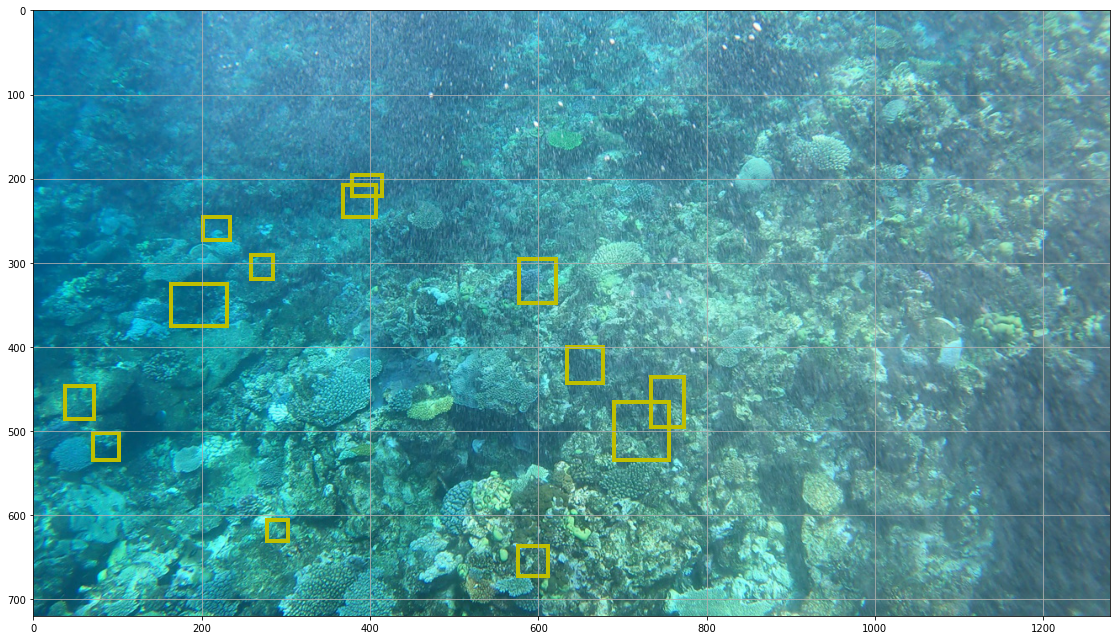

In [144]:
# Exercise loading the dataset
reload(data_utils)
data=data_utils.DataLoaderFull(input_file='tensorflow-great-barrier-reef')
images= data.get_training(validation_split=0.2, batch_size=64, shuffle=True)

# Check that the image batch looks like what we expect
for image,label in images:
        
    figure(figsize=(16,9))
    imshow(image[0].numpy() / 255.)
    for annotation in data.decode_label(label[0].numpy()):
        print(annotation)
        rect = patches.Rectangle((annotation['x'], annotation['y']), 
                             annotation['width'], annotation['height'], 
                             linewidth=4, edgecolor='y', facecolor='none')
        gca().add_patch(rect)
    gca().grid('True')
    tight_layout()
    show()
    break

In [110]:
# Get a new set of images, these should be different but have correct annotations
reload(data_utils)
data=data_utils.DataLoaderThumbnail(input_file='tensorflow-great-barrier-reef')
images = data.get_training(validation_split=0.2, batch_size=9, shuffle=True)

for image,label in images:
    print(image[0])
    print(label[0])
    break
    # TODO make some plots!

Found 23501 files belonging to 3 classes.
Using 18801 files for training.
Found 23501 files belonging to 3 classes.
Using 4700 files for validation.
Tensor("image:0", shape=(None, 256, 256, 3), dtype=float32)
Tensor("label:0", shape=(None,), dtype=int32)


OperatorNotAllowedInGraphError: in user code:

    File "/Users/Neil/Documents/tensorflow-experiment/great-barrier-reef/data_utils.py", line 216, in transform_full_to_thumbnail  *
        print(tf.map_fn(self.decode_label, label))
    File "/Users/Neil/Documents/tensorflow-experiment/great-barrier-reef/data_utils.py", line 141, in decode_label  *
        st = self.labels['annotations'][label].replace('\'', '\"')
    File "/Users/Neil/Library/Python/3.8/lib/python/site-packages/pandas/core/series.py", line 966, in __getitem__
        return self._get_with(key)
    File "/Users/Neil/Library/Python/3.8/lib/python/site-packages/pandas/core/series.py", line 988, in _get_with
        key = list(key)

    OperatorNotAllowedInGraphError: iterating over `tf.Tensor` is not allowed: AutoGraph did convert this function. This might indicate you are trying to use an unsupported feature.
